In [22]:

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
from datetime import datetime, timedelta
from ipywidgets import interact
import itertools


In [23]:
dataDir = os.path.join('C:\\Users\\AMC\\Desktop\\Roshi\\Data')
confirmed = 'confirmed_july.csv'
deaths = 'deaths_july.csv'
recovered = 'recovered_july.csv'

In [24]:
df_confirmed = pd.read_csv(confirmed)
df_recovered = pd.read_csv(recovered)
df_deaths = pd.read_csv(deaths)

In [27]:
covidFrDict = {}
covidFrDict['confirmed'] = pd.read_csv(os.path.join(confirmed))
covidFrDict['deaths'] = pd.read_csv(os.path.join(deaths))
covidFrDict['recovered'] = pd.read_csv(os.path.join(recovered))

In [28]:
# Date list
from datetime import datetime, timedelta
colNamesList = list(covidFrDict['confirmed'])
dateList = [colName for colName in colNamesList if '/20' in colName] # Dates always have '/20' in them

# Create list of datetime objects from date strings
dateTimeOjectList = [datetime.strptime(timeStr, '%m/%d/%y') for timeStr in dateList]

In [29]:
def getCountryCovidFrDict(countryName):
    countryCovidFrDict = {}
    for key in covidFrDict.keys():
        dataFr = covidFrDict[key]
        countryCovidFrDict[key] = dataFr[dataFr['Country/Region'] == countryName]
    return countryCovidFrDict

In [30]:
# PLot country data
import matplotlib.pyplot as plt
def plotCountryData(countryName, logScale=False):
    countryCovidFrDict = getCountryCovidFrDict(countryName)
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    for key in countryCovidFrDict.keys():
        casesByDateDict = dict(countryCovidFrDict[key][dateList].sum(axis=0))
        
        if logScale:
            for dateKey in casesByDateDict.keys():
                if casesByDateDict[dateKey] == 0:
                    casesByDateDict[dateKey] = np.nan
        ax.plot(list(casesByDateDict.keys()), list(casesByDateDict.values()), marker='o', label=key);

    plt.xticks(rotation=45, ha="right");
    
    if logScale:
        plt.yscale('log')

    every_nth = 10
    for n, label in enumerate(ax.xaxis.get_ticklabels()):
        if n % every_nth != 0:
            label.set_visible(False)
    ax.legend(loc='upper left');
    plt.title('Cases for {}'.format(countryName), fontsize=26);
    plt.xlabel('Date', fontsize=18);
    plt.ylabel('Number of cases', fontsize=18);

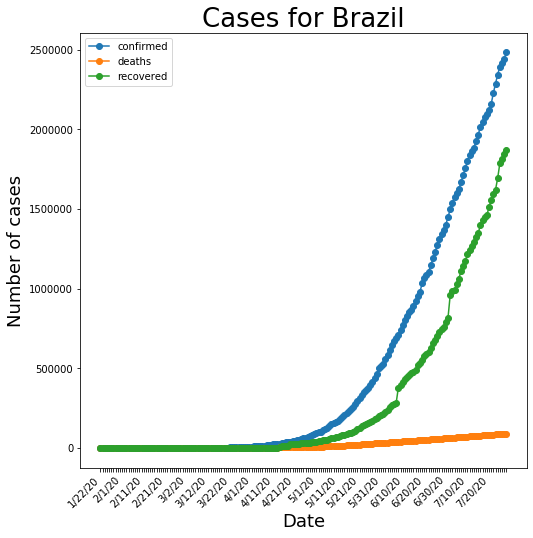

In [31]:
#Brazil plot
plotCountryData('Brazil', logScale=False)

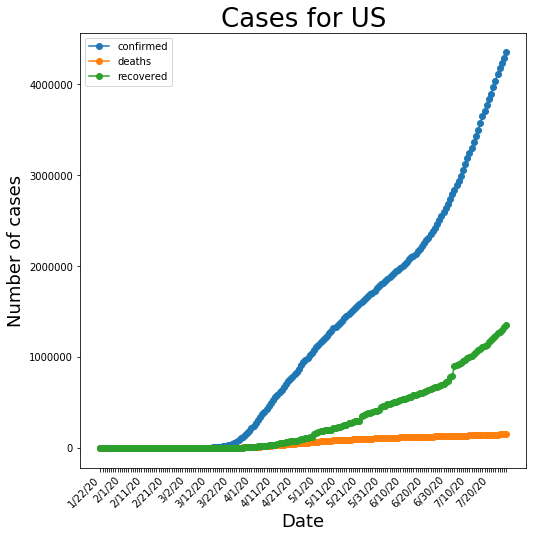

In [32]:
#US plot
plotCountryData('US', logScale=False)

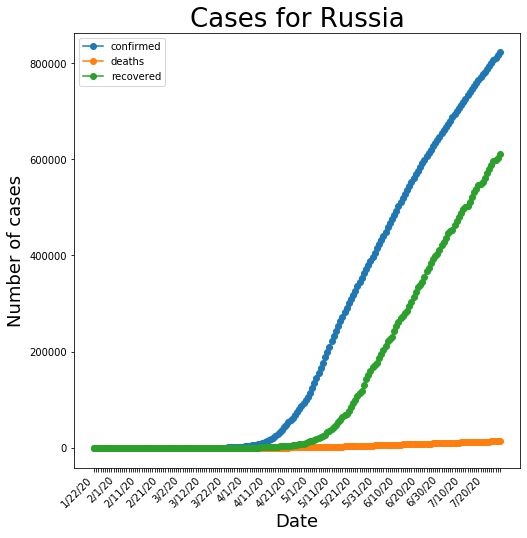

In [33]:
#Russia plot
plotCountryData('Russia', logScale=False)

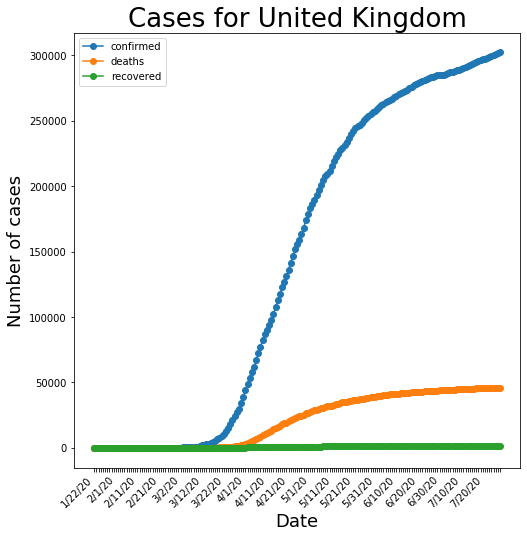

In [34]:
#UK plot
plotCountryData('United Kingdom', logScale=False)